In [11]:
import numpy as np
from ansys.mapdl.core import launch_mapdl
from apdl_tests import *
from basic_beam import *
import os


In [12]:
# Initialize the MAPDL session
path = os.getcwd()
jname = 'basic_beam'
mapdl = launch_mapdl(run_location=path, jobname=jname, override=True)

mapdl.finish()
mapdl.clear()
print(mapdl)


PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
Product:             Ansys Mechanical Enterprise Academic Research
MAPDL Version:       21.2
ansys.mapdl Version: 0.64.1



In [14]:

mapdl.finish()
mapdl.clear()
# Define parameters
youngs_modulus = 200e9
poissons_ratio = 0.3
beam_length = 10e-3
flexure_length = 3e-3
beam_thickness = 2e-3
flexure_thickness = 0.4e-3
theta = np.pi/8
disp_in = 2*flexure_length*np.sin(theta)

beam_depth = 5e-3

flexure_spacing = 3e-3


# Define material properties and element type
mapdl.prep7()
mapdl.et(1, "BEAM188")
mapdl.mp("EX", 1, youngs_modulus)  # Young's modulus
mapdl.mp("PRXY", 1, poissons_ratio)  # Poisson's ratio

mapdl.sectype(1, "BEAM", "RECT", 1)
mapdl.secdata(beam_thickness, beam_depth, 2, 2)

mapdl.sectype(2, "BEAM", "RECT", 1)
mapdl.secdata(flexure_thickness, beam_depth, 2, 2)


SECTION ID NUMBER IS:            2
   BEAM SECTION TYPE IS:     Rectangle       
   BEAM SECTION NAME IS:     1       
   COMPUTED BEAM SECTION DATA SUMMARY:
    Area                 = 0.20000E-05
    Iyy                  = 0.41667E-11
    Iyz                  = 0.63109E-29
    Izz                  = 0.26667E-13
    Warping Constant     = 0.53922E-19
    Torsion Constant     = 0.10463E-12
    Centroid Y           =-0.80779E-20
    Centroid Z           = 0.51699E-19
    Shear Center Y       = 0.48388E-16
    Shear Center Z       =-0.28167E-17
    Shear Correction-xy  = 0.84211    
    Shear Correction-yz  =-0.28250E-13
    Shear Correction-xz  = 0.84211    
                 
    Beam Section is offset to CENTROID of cross section

C:\Users\eoinl\AppData\Roaming\Python\Python310\site-packages\ansys\mapdl\core\_commands\graphics_\style.py:271: UserWarning: pymapdl does not support /ESHAPE when plotting in Python using ``mapdl.eplot()``.  Use ``mapdl.eplot(vtk=False)`` 
  warnings.warn(


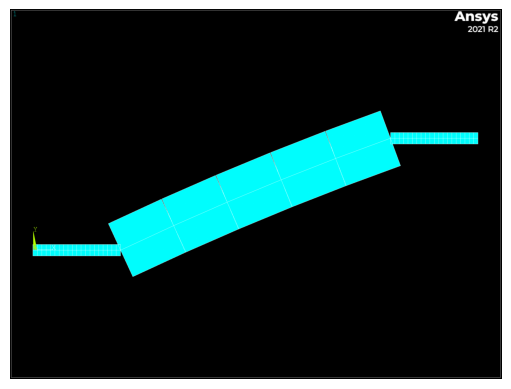

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:


link1 = generate_flexure_keypoints(mapdl, flexure_length, beam_length, theta)
lines = generate_flexure_lines(mapdl, link1)
mesh_flexure(mapdl, lines)

# get offset from the first keypoint in the link
# k2 = np.array([0, flexure_spacing, 0])


# k2 = mapdl.k("", *k2)
# link2  = generate_flexure_keypoints(mapdl, flexure_length, beam_length, np.pi/8, k2)
# lines2 = generate_flexure_lines(mapdl, link2)


# mesh_flexure(mapdl, lines2)


# plot meshed geometry vtk false
mapdl.eshape(1)
mapdl.eplot(vtk=False)


In [16]:
mapdl.ksel("S", "KP", "", link1[0])
mapdl.nslk("S")
mapdl.cm("fixed", "NODES")
mapdl.allsel()

mapdl.ksel("S", "KP", "", link1[-1])
mapdl.nslk("S")
mapdl.cm("moving", "NODES")
mapdl.allsel()







SELECT ALL ENTITIES OF TYPE= ALL  AND BELOW

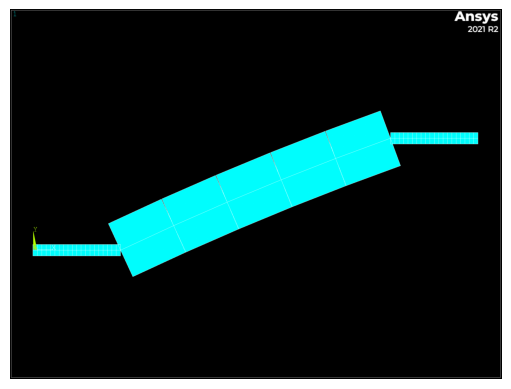

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [17]:
mapdl.eshape(1)
mapdl.eplot(vtk=False)


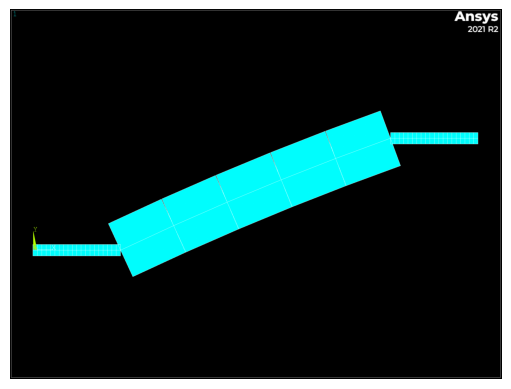

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [21]:
mapdl.prep7()
mapdl.slashsolu()
mapdl.antype(0)
mapdl.nlgeom("ON")
mapdl.eqslv("SPARSE")
mapdl.outres("ALL", "ALL")
mapdl.autots("ON")
mapdl.neqit(30)
mapdl.deltim(1e-3, 1e-5, 1e-2, "ON")

mapdl.d("fixed", "ALL", 0)
mapdl.d("moving", "ALL", 0)
mapdl.d("moving", "UY", disp_in)
mapdl.eshape(1)
mapdl.eplot(vtk=False, show_node_numbering=True, background="black", show_bounds=True, font_size=26, color="white")



In [22]:
mapdl.solve()

*** NOTE ***                            CP =       3.047   TIME= 22:40:38
 The automatic domain decomposition logic has selected the MESH domain   
 decomposition method with 2 processes per solution.                     

 *****  ANSYS SOLVE    COMMAND  *****

 *** NOTE ***                            CP =       3.047   TIME= 22:40:38
 There is no title defined for this analysis.                            

 *** SELECTION OF ELEMENT TECHNOLOGIES FOR APPLICABLE ELEMENTS ***
                ---GIVE SUGGESTIONS ONLY---

 ELEMENT TYPE         1 IS BEAM188 . KEYOPT(1)=1 IS SUGGESTED FOR NON-CIRCULAR CROSS
 SECTIONS AND KEYOPT(3)=2 IS ALWAYS SUGGESTED.

 ELEMENT TYPE         1 IS BEAM188 . KEYOPT(15) IS ALREADY SET AS SUGGESTED.



 *** ANSYS - ENGINEERING ANALYSIS SYSTEM  RELEASE 2021 R2          21.2     ***
 DISTRIBUTED Ansys Mechanical Enterprise Academic Research     

 00000000  VERSION=WINDOWS x64   22:40:38  MAY 21, 2023 CP=      3.047

                                              

In [33]:
mapdl.post26()
mapdl.nsol(2,27,"U","Y","YDISP")
mapdl.rforce(3,27,"F","Y","YFORCE")


VARIABLE  3 IS REACTION FORCE      27 FY    YFORCE

In [28]:
#Post processing


['ELEMENT_INDEX_TABLE_KEYS',
 'ELEMENT_RESULT_NCOMP',
 '_Result__element_map',
 '__annotations__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_animate_point_scalars',
 '_animate_time_solution',
 '_animating',
 '_available_results',
 '_bc_header',
 '_c_systems',
 '_cfile',
 '_eeqv',
 '_element_map',
 '_element_solution_header',
 '_element_table',
 '_extract_element_components',
 '_extract_node_components',
 '_extract_surface_element_result',
 '_filename',
 '_geometry_header',
 '_ignore154',
 '_insolution',
 '_is_cyclic',
 '_is_distributed',
 '_is_main',
 '_is_thermal',
 '_load_element_table',
 '_load_materials',
 '_load_section_data',
 '_map_flag',
 '_

In [9]:
# quit the mapdl session
mapdl.finish()
mapdl.clear()
mapdl.exit()
